In [ ]:
# Google Colab integration
from google.colab import drive

# System utilities
import os
import itertools
from tqdm import tqdm

# Core data packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Sklearn - preprocessing, models, evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, f1_score, auc)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, StackingClassifier)

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# External libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Model explainability
import shap

# Deep learning with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Reading dataset and preprocessing





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Final Year Project/Data/Joined Datasets')


In [ ]:
import pandas as pd
ml_df = pd.read_csv("final_ml_ready_dataset.csv")

In [ ]:
ml_df.head()


,Flight Number,Airline,Aircraft Model,Departure Airport,Departure Terminal,Departure Gate,Arrival Airport,Aircraft Size,Delayed,Flight Duration (Hours),...,busiest_day,peak_season,Wind Speed (KT),Visibility (m),Temperature (C),Dew Point (C),Pressure (hPa),Humidity (%),hour_of_day,day_of_week
0,684,20,4,0,1.0,5,135,1.0,1,3.916667,...,1,0,14,10000.0,4,3,983,93.2,5,4
1,807,29,4,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
2,815,6,0,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
3,785,15,4,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
4,284,8,7,0,1.0,35,157,3.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4


In [ ]:
null_values = ml_df.isnull().sum()
null_values[null_values > 0]


,0
Visibility (m),1


In [ ]:
ml_df = ml_df.dropna(subset=['Visibility (m)'])


In [ ]:
ml_df = ml_df.drop(columns=['Departure Delay', 'Flight Duration (Minutes)'], errors='ignore')


In [ ]:
ml_df.head()

,Flight Number,Airline,Aircraft Model,Departure Airport,Departure Terminal,Departure Gate,Arrival Airport,Aircraft Size,Delayed,Flight Duration (Hours),...,busiest_day,peak_season,Wind Speed (KT),Visibility (m),Temperature (C),Dew Point (C),Pressure (hPa),Humidity (%),hour_of_day,day_of_week
0,684,20,4,0,1.0,5,135,1.0,1,3.916667,...,1,0,14,10000.0,4,3,983,93.2,5,4
1,807,29,4,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
2,815,6,0,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
3,785,15,4,0,1.0,35,157,1.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4
4,284,8,7,0,1.0,35,157,3.0,1,2.666667,...,1,0,14,10000.0,4,3,983,93.2,5,4


In [ ]:
print(ml_df.dtypes)

Flight Number                int64
Airline                      int64
Aircraft Model               int64
Departure Airport            int64
Departure Terminal         float64
Departure Gate               int64
Arrival Airport              int64
Aircraft Size              float64
Delayed                      int64
Flight Duration (Hours)    float64
peak_hour                    int64
busiest_day                  int64
peak_season                  int64
Wind Speed (KT)              int64
Visibility (m)             float64
Temperature (C)              int64
Dew Point (C)                int64
Pressure (hPa)               int64
Humidity (%)               float64
hour_of_day                  int64
day_of_week                  int64
dtype: object


In [ ]:
ml_df.shape

(29887, 21)

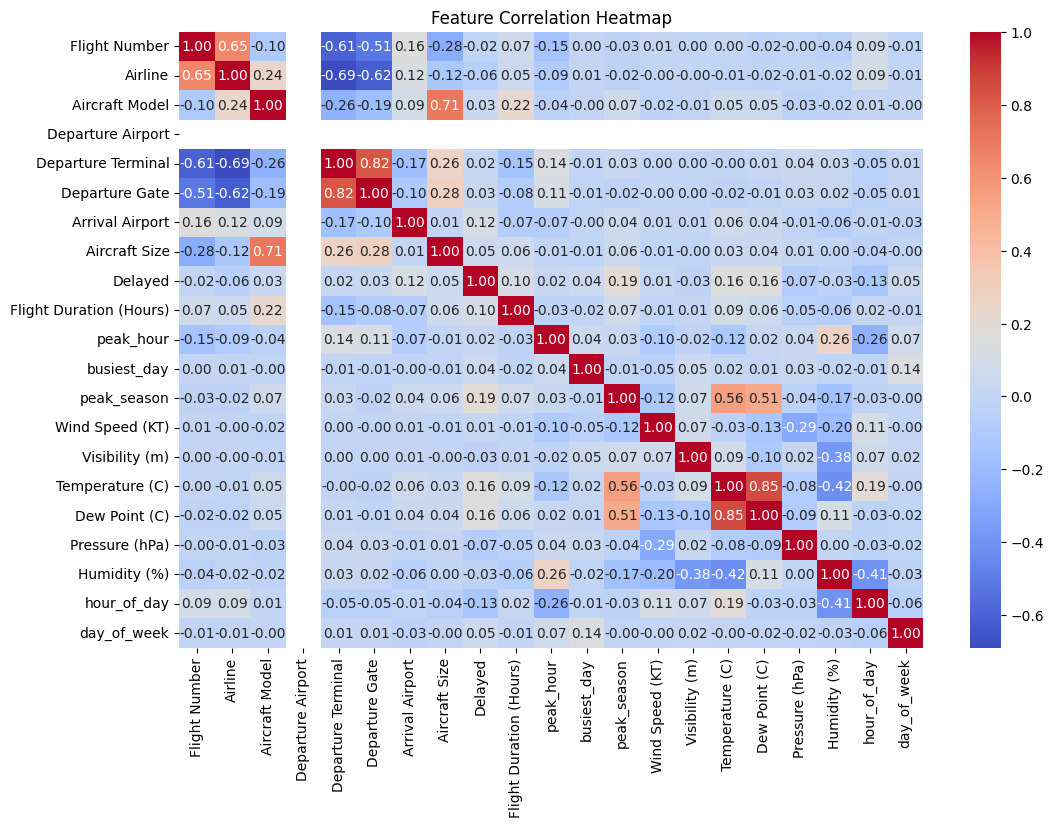

In [ ]:
correlation_matrix = ml_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Logistic Regression

Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

Model Accuracy (Tuned with SMOTE): 0.6345
ROC AUC Score: 0.6788

Confusion Matrix:
 [[1007  634]
 [1551 2786]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.61      0.48      1641
           1       0.81      0.64      0.72      4337

    accuracy                           0.63      5978
   macro avg       0.60      0.63      0.60      5978
weighted avg       0.70      0.63      0.65      5978



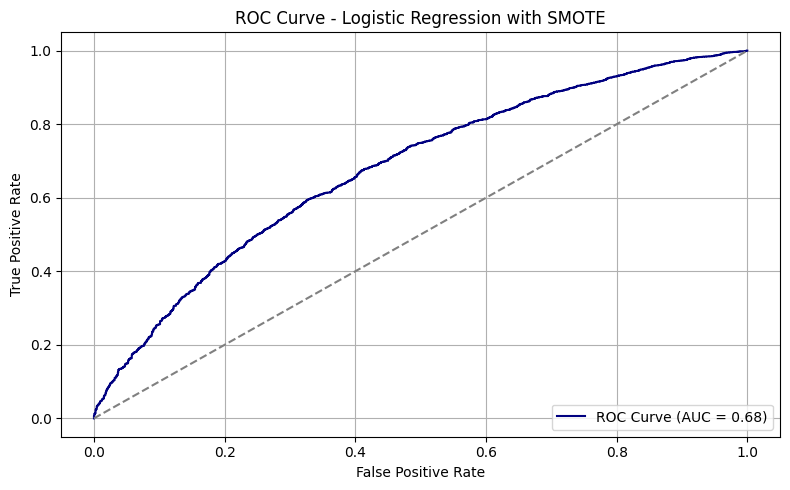

In [ ]:
# Features & target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle NaN values
X_train_scaled = np.nan_to_num(X_train_scaled, nan=np.nanmedian(X_train_scaled))
X_test_scaled = np.nan_to_num(X_test_scaled, nan=np.nanmedian(X_test_scaled))

# Applied SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_log_reg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_log_reg.predict(X_test_scaled)
y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nModel Accuracy (Tuned with SMOTE): {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Features & target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle NaN values
X_train_scaled = np.nan_to_num(X_train_scaled, nan=np.nanmedian(X_train_scaled))
X_test_scaled = np.nan_to_num(X_test_scaled, nan=np.nanmedian(X_test_scaled))

# Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_log_reg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy (Tuned): {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Model Accuracy (Tuned): 0.6363

Confusion Matrix:
 [[1034  616]
 [1558 2770]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.63      0.49      1650
           1       0.82      0.64      0.72      4328

    accuracy                           0.64      5978
   macro avg       0.61      0.63      0.60      5978
weighted avg       0.70      0.64      0.65      5978



# XGB Boost

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:47:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

XGBoost Optimised
Accuracy: 0.8322
ROC AUC Score: 0.8769
Confusion Matrix:
 [[1023  618]
 [ 385 3952]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67      1641
           1       0.86      0.91      0.89      4337

    accuracy                           0.83      5978
   macro avg       0.80      0.77      0.78      5978
weighted avg       0.83      0.83      0.83      5978



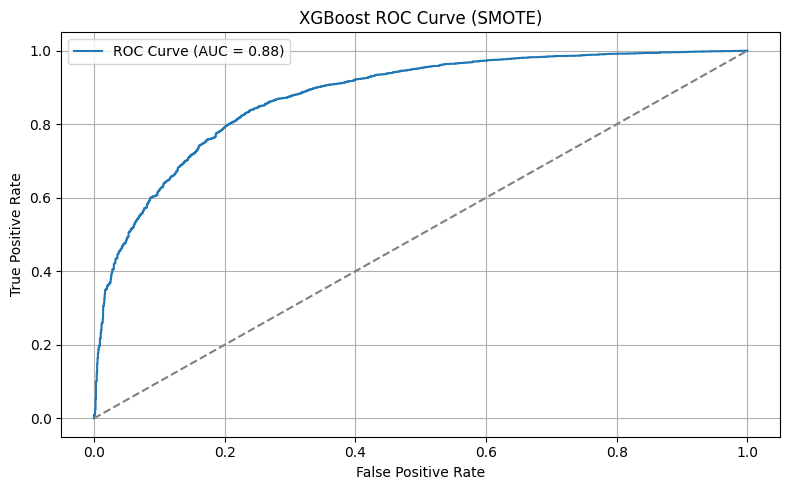

In [ ]:
# Split features and target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nXGBoost Optimised")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


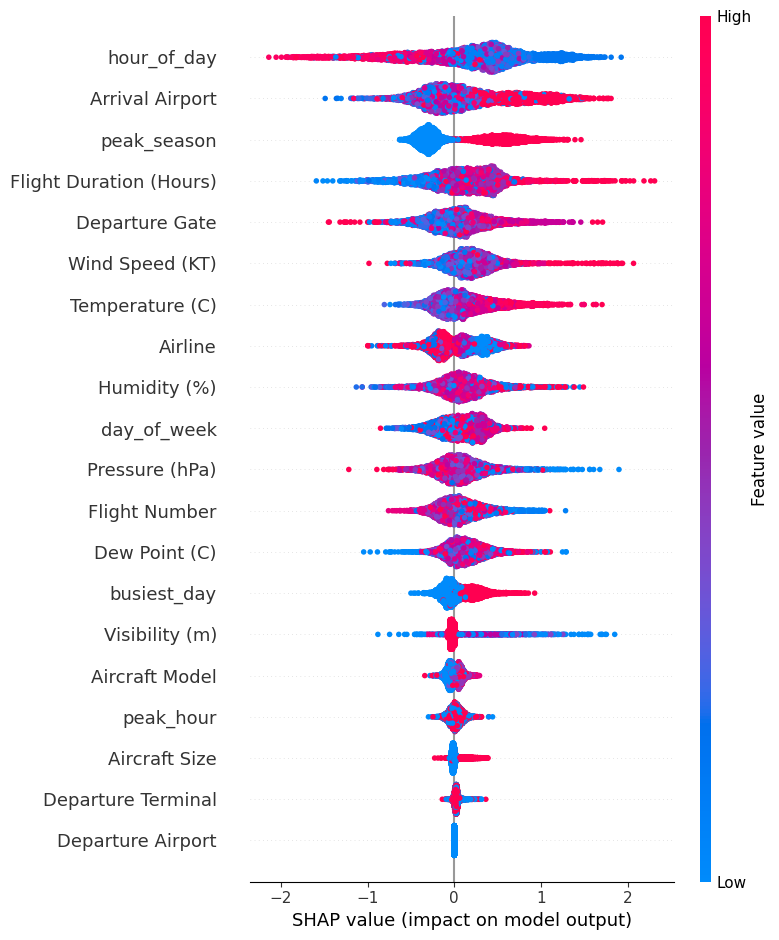

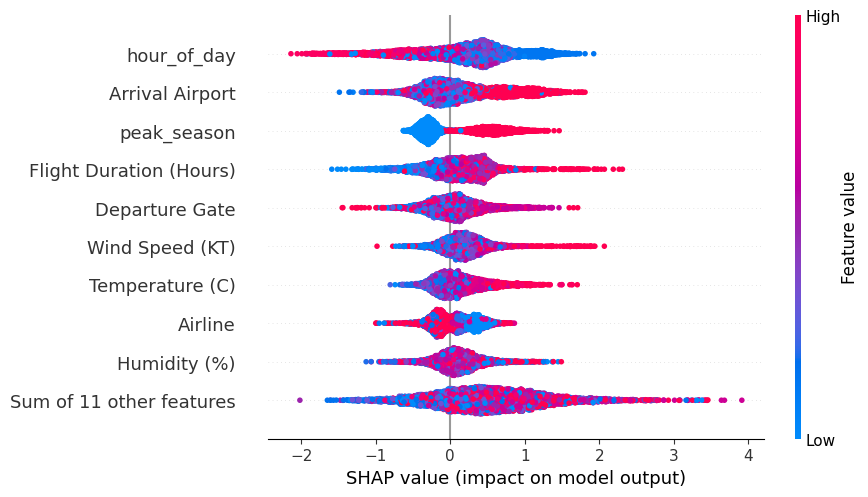

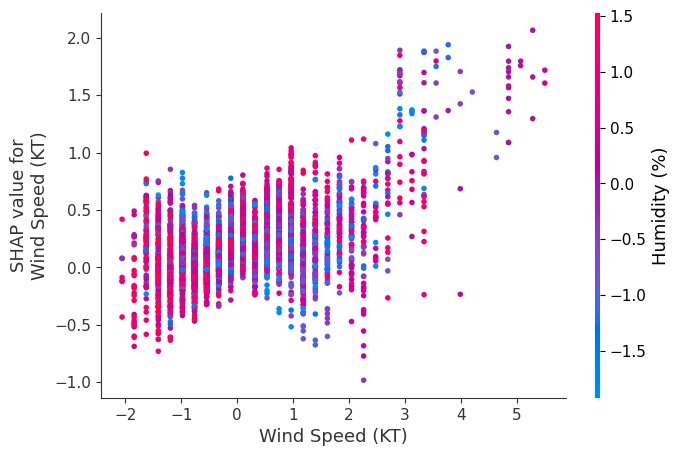

In [ ]:
import shap
import numpy as np

# Initialize SHAP TreeExplainer with the best model
explainer = shap.TreeExplainer(best_model)

# SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# global feature importance
shap.summary_plot(shap_values, X_test_df)

# beeswarm plot
shap.plots.beeswarm(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_df))

# dependence plot for a specific feature
shap.dependence_plot("Wind Speed (KT)", shap_values, X_test_df, interaction_index="Humidity (%)")



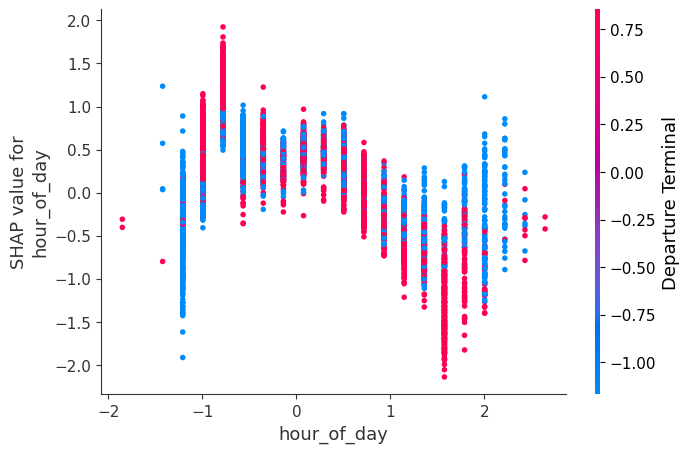

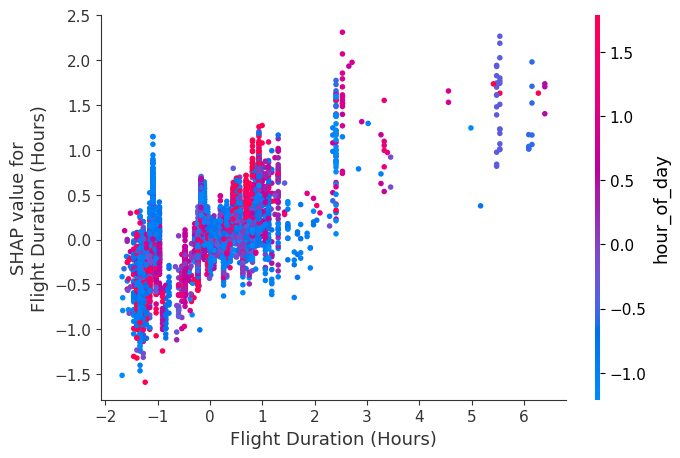

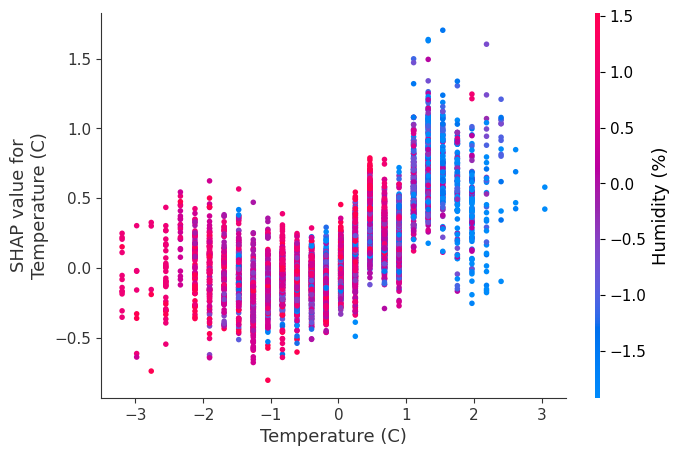

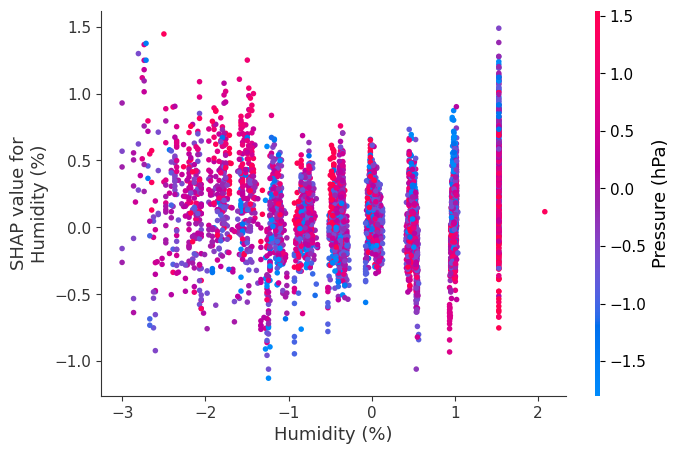

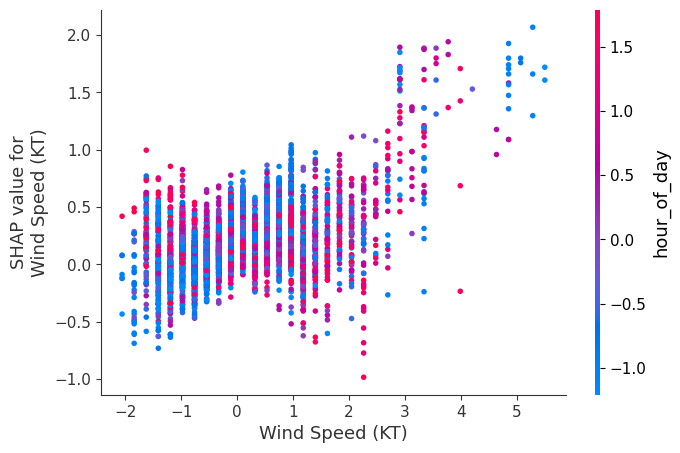

In [ ]:
shap.dependence_plot("hour_of_day", shap_values, X_test_df)
shap.dependence_plot("Flight Duration (Hours)", shap_values, X_test_df)
shap.dependence_plot("Temperature (C)", shap_values, X_test_df)
shap.dependence_plot("Humidity (%)", shap_values, X_test_df)
shap.dependence_plot("Wind Speed (KT)", shap_values, X_test_df)


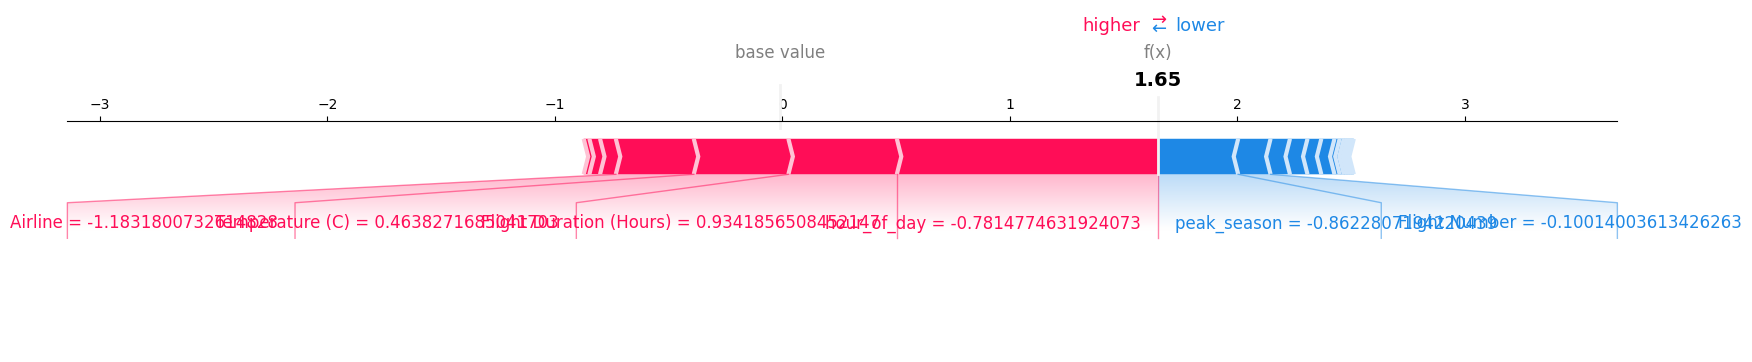

In [ ]:
instance_idx = 5
if isinstance(shap_values, list):
    shap_val = shap_values[1][instance_idx]
    expected_val = explainer.expected_value[1]
else:
    shap_val = shap_values[instance_idx]
    expected_val = explainer.expected_value

# Force plot for local interpretability
shap.initjs()
shap.force_plot(
    expected_val,
    shap_val,
    X_test_df.iloc[instance_idx],
    matplotlib=True
)



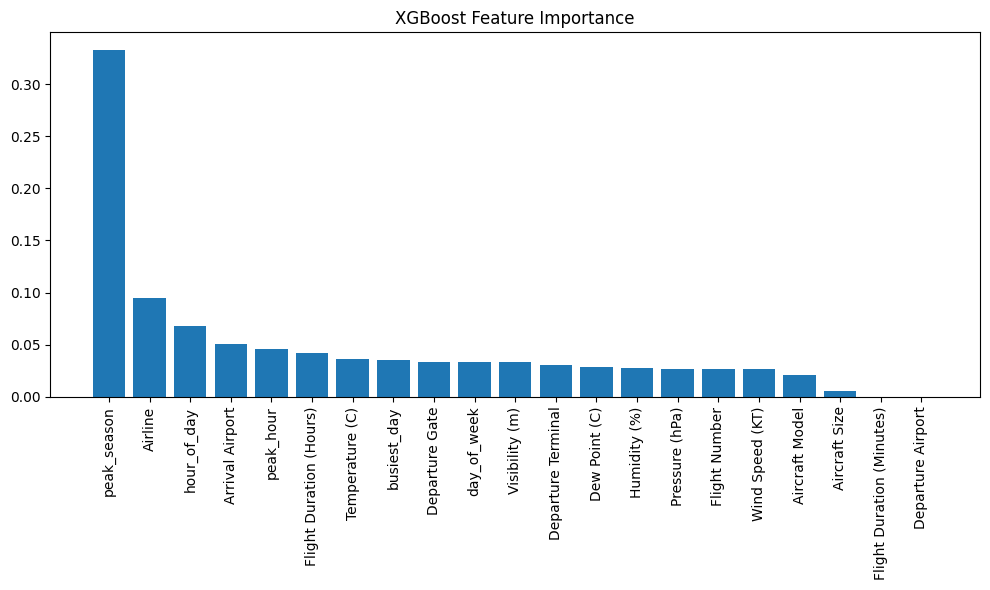

In [ ]:
importances = xgb_model.feature_importances_
features = X.columns

# Sorted features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")


peak_season: 0.3330
Airline: 0.0951
hour_of_day: 0.0683
Arrival Airport: 0.0506
peak_hour: 0.0462
Flight Duration (Hours): 0.0423
Temperature (C): 0.0366
busiest_day: 0.0356
Departure Gate: 0.0336
day_of_week: 0.0336
Visibility (m): 0.0334
Departure Terminal: 0.0302
Dew Point (C): 0.0285
Humidity (%): 0.0271
Pressure (hPa): 0.0270
Flight Number: 0.0268
Wind Speed (KT): 0.0263
Aircraft Model: 0.0208
Aircraft Size: 0.0051
Flight Duration (Minutes): 0.0000
Departure Airport: 0.0000


                                         Feature  SHAP Value  Feature Value
hour_of_day                          hour_of_day    1.146348      -0.781477
Flight Duration (Hours)  Flight Duration (Hours)    0.476543       0.934186
Temperature (C)                  Temperature (C)    0.415832       0.463827
peak_season                          peak_season   -0.353979      -0.862281
Airline                                  Airline    0.342625      -1.183180


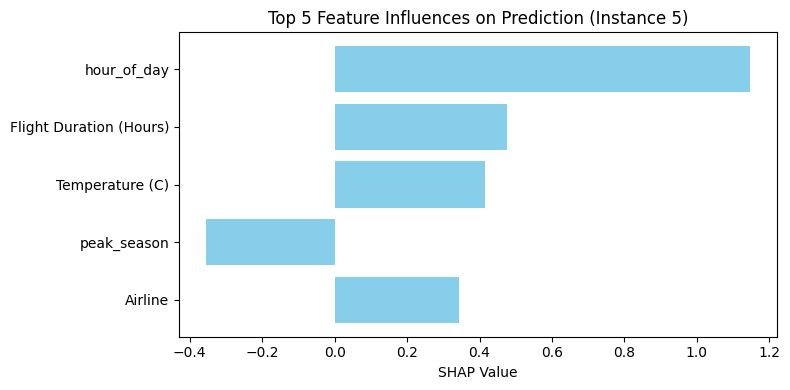

In [ ]:
instance_idx = 5

if isinstance(shap_values, list):
    shap_val = shap_values[1][instance_idx]
else:
    shap_val = shap_values[instance_idx]


feature_names = X_test_df.columns
feature_values = X_test_df.iloc[instance_idx]


shap_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': shap_val,
    'Feature Value': feature_values
})

shap_df['Abs SHAP'] = shap_df['SHAP Value'].abs()
top5_shap = shap_df.sort_values(by='Abs SHAP', ascending=False).head(5)
top5_shap = top5_shap.drop(columns='Abs SHAP')
print(top5_shap)


plt.figure(figsize=(8, 4))
plt.barh(top5_shap['Feature'], top5_shap['SHAP Value'], color='skyblue')
plt.xlabel('SHAP Value')
plt.title('Top 5 Feature Influences on Prediction (Instance {})'.format(instance_idx))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# GBM and LightGBM

```
# This is formatted as code
```



In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train_scaled, y_train)

# Predict
y_pred = gbm.predict(X_test_scaled)
y_prob = gbm.predict_proba(X_test_scaled)[:, 1]

# Plot
print("Gradient Boosting (sklearn) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting (sklearn) Results:
Accuracy: 0.7631
ROC AUC: 0.7674
Confusion Matrix:
 [[ 449 1201]
 [ 215 4113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.27      0.39      1650
           1       0.77      0.95      0.85      4328

    accuracy                           0.76      5978
   macro avg       0.73      0.61      0.62      5978
weighted avg       0.75      0.76      0.72      5978



Gradient Boosting with SMOTE Results:
Accuracy: 0.7218
ROC AUC: 0.7596
Confusion Matrix:
 [[ 958  692]
 [ 971 3357]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54      1650
           1       0.83      0.78      0.80      4328

    accuracy                           0.72      5978
   macro avg       0.66      0.68      0.67      5978
weighted avg       0.74      0.72      0.73      5978



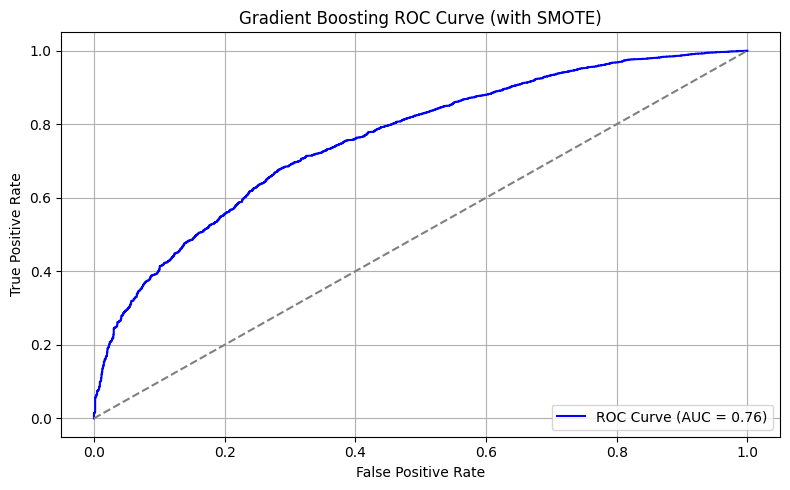

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train_smote, y_train_smote)

y_pred = gbm.predict(X_test_scaled)
y_prob = gbm.predict_proba(X_test_scaled)[:, 1]

# Results
print("Gradient Boosting with SMOTE Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve (with SMOTE)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting with SMOTE and Grid Search Results:
Accuracy: 0.7993
ROC AUC: 0.8447
Confusion Matrix:
 [[ 866  784]
 [ 416 3912]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.52      0.59      1650
           1       0.83      0.90      0.87      4328

    accuracy                           0.80      5978
   macro avg       0.75      0.71      0.73      5978
weighted avg       0.79      0.80      0.79      5978



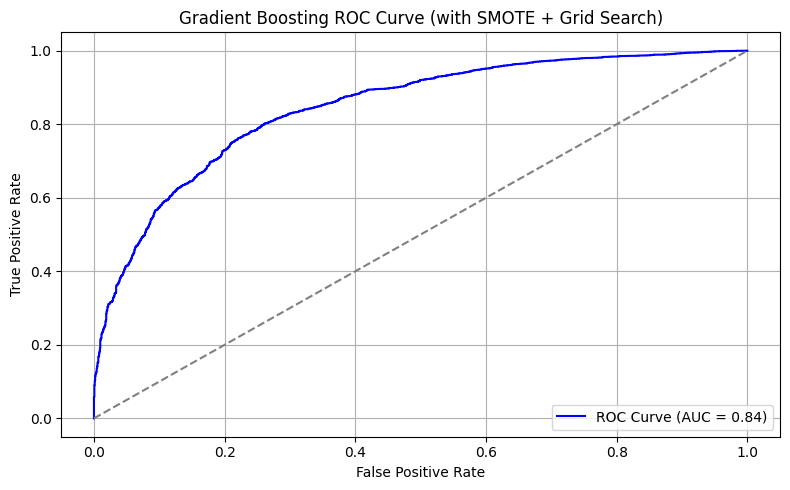

In [ ]:
# Features and target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the model
gbm = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# grid search
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_gbm = grid_search.best_estimator_

# Predictions
y_pred = best_gbm.predict(X_test_scaled)
y_prob = best_gbm.predict_proba(X_test_scaled)[:, 1]

# Results
print("Best Hyperparameters:", grid_search.best_params_)
print("Gradient Boosting with SMOTE and Grid Search Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve (with SMOTE + Grid Search)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install lightgbm


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17353, number of negative: 6556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 23909, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.725794 -> initscore=0.973385
[LightGBM] [Info] Start training from score 0.973385
LightGBM Accuracy: 0.7920709267313483
Confusion Matrix:
 [[ 680  970]
 [ 273 4055]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.41      0.52      1650
           1       0.81      0.94      0.87      4328

    accuracy                           0.79      5978
   macro avg       0.76      0.67      

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17353, number of negative: 17353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3734
[LightGBM] [Info] Number of data points in the train set: 34706, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM with SMOTE and GridSearchCV Results:
Best Parameters: {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 50}
Accuracy: 0.8106
ROC AUC Score: 0.8515
Confusion Matrix:
 [[ 909  741]
 [ 391 3937]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62      1650
           1       0.84      0.91      0.87      4328

    accuracy                           0.81      5978
   macro avg       0.77      0.73      0.75      5978
weighted avg       0.80      0.81      0.80      5978



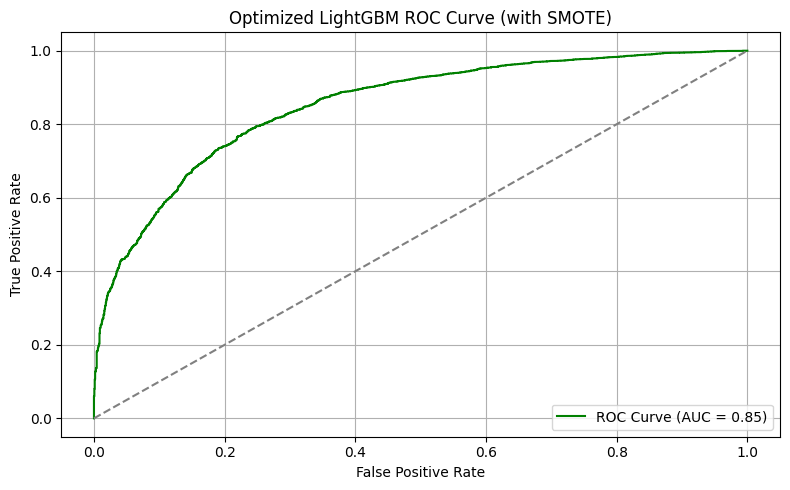

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pipeline with SMOTE and LightGBM
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
])

# hyperparameter grid
param_grid = {
    'lgbm__n_estimators': [100, 200],
    'lgbm__learning_rate': [0.01, 0.1],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__num_leaves': [15, 31, 50]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Results
print("LightGBM with SMOTE and GridSearchCV Results:")
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Optimized LightGBM ROC Curve (with SMOTE)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



# CNN

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  CNN input
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Compute class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compile
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
y_pred_prob_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32").flatten()

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
f1_macro_cnn = f1_score(y_test, y_pred_cnn, average='macro')
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)

# Output results
print(f"CNN Results:")
print(f"Accuracy     : {accuracy_cnn:.4f}")
print(f"ROC-AUC      : {roc_auc_cnn:.4f}")
print(f"F1 Macro     : {f1_macro_cnn:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_cnn)
print("\nClassification Report:\n", class_report_cnn)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6152 - loss: 0.6527 - val_accuracy: 0.5985 - val_loss: 0.6658
Epoch 2/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6553 - loss: 0.6159 - val_accuracy: 0.6002 - val_loss: 0.6745
Epoch 3/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6614 - loss: 0.6116 - val_accuracy: 0.6537 - val_loss: 0.6065
Epoch 4/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6706 - loss: 0.6013 - val_accuracy: 0.6320 - val_loss: 0.6405
Epoch 5/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6779 - loss: 0.5891 - val_accuracy: 0.6964 - val_loss: 0.5715
Epoch 6/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6872 - loss: 0.5825 - val_accuracy: 0.6788 - val_loss: 0.5817
Epoch 7/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6896 - loss: 0.5808 - val_accuracy: 0.6675 - val_loss: 0.5911
Epoch 8/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6839 - loss: 0.5821 - val_accuracy: 0.

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Reshape for Conv1D
X_train_cnn = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

#Build CNN model
def build_cnn_model(filters=64, kernel_size=3, dense_units=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model
cnn_model = build_cnn_model()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model.fit(
    X_train_cnn,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
y_pred_prob_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32").flatten()

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
f1_macro_cnn = f1_score(y_test, y_pred_cnn, average='macro')
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)

print(f"CNN with SMOTE Results:")
print(f"Accuracy     : {accuracy_cnn:.4f}")
print(f"ROC-AUC      : {roc_auc_cnn:.4f}")
print(f"F1 Macro     : {f1_macro_cnn:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_cnn)
print("\nClassification Report:\n", class_report_cnn)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


976/976 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6409 - loss: 0.6333 - val_accuracy: 0.5826 - val_loss: 0.6893
Epoch 2/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6720 - loss: 0.5983 - val_accuracy: 0.6244 - val_loss: 0.6406
Epoch 3/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6852 - loss: 0.5828 - val_accuracy: 0.6754 - val_loss: 0.6113
Epoch 4/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6964 - loss: 0.5734 - val_accuracy: 0.7293 - val_loss: 0.5484
Epoch 5/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6949 - loss: 0.5732 - val_accuracy: 0.6244 - val_loss: 0.6630
Epoch 6/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7020 - loss: 0.5678 - val_accuracy: 0.5656 - val_loss: 0.7284
Epoch 7/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7059 - loss: 0.5599 - val_accuracy: 0.6253 - val_loss: 0.6558
Epoch 8/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7085 - loss: 0.5545 - val_accuracy: 0.8080 - v

# MLP (Artificial Neural Network)

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# MLP model
def build_mlp_model(input_dim, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_model = build_mlp_model(X_train_resampled.shape[1])

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mlp_model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluation
y_pred_prob_mlp = mlp_model.predict(X_test_scaled)
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype('int32').flatten()

print("MLP Results:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Macro     : {f1_score(y_test, y_pred_mlp, average='macro'):.4f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_pred_prob_mlp):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6316 - loss: 0.6365 - val_accuracy: 0.6446 - val_loss: 0.6306
Epoch 2/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6838 - loss: 0.5953 - val_accuracy: 0.5791 - val_loss: 0.6881
Epoch 3/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6871 - loss: 0.5858 - val_accuracy: 0.6232 - val_loss: 0.6749
Epoch 4/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6995 - loss: 0.5774 - val_accuracy: 0.6117 - val_loss: 0.6582
Epoch 5/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7020 - loss: 0.5688 - val_accuracy: 0.6552 - val_loss: 0.6343
Epoch 6/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6997 - loss: 0.5696 - val_accuracy: 0.6572 - val_loss: 0.6284
Epoch 7/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7107 - loss: 0.5560 - val_accuracy: 0.6855 - val_loss: 0.5991
Epoch 8/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7120 - loss: 0.5572 - val_accuracy: 0.6843 - val_

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# hyperparameter grid
param_grid = {
    'hidden_units': [(128, 64), (256, 128, 64)],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0005]
}

# all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))
param_names = list(param_grid.keys())

# Storage for results
cv_results = []

# 3-fold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# model builder
def build_mlp(input_dim, hidden_units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_units[0], activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    for units in hidden_units[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# grid search
for combo in tqdm(param_combinations, desc="Grid Search"):
    params = dict(zip(param_names, combo))
    fold_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)

        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_fold)

        # Build model
        model = build_mlp(
            input_dim=X_train_resampled.shape[1],
            hidden_units=params['hidden_units'],
            dropout_rate=params['dropout_rate'],
            learning_rate=params['learning_rate']
        )

        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

        model.fit(
            X_train_resampled, y_train_resampled,
            validation_data=(X_val_scaled, y_val_fold),
            epochs=30,
            batch_size=32,
            callbacks=[early_stop],
            verbose=0
        )

        # Predict
        y_val_prob = model.predict(X_val_scaled).flatten()
        y_val_pred = (y_val_prob > 0.5).astype(int)
        f1 = f1_score(y_val_fold, y_val_pred, average='macro')
        fold_scores.append(f1)

    avg_f1 = np.mean(fold_scores)
    cv_results.append({**params, 'avg_f1_macro': avg_f1})

# Create DataFrame and sort by best score
results_df = pd.DataFrame(cv_results).sort_values(by='avg_f1_macro', ascending=False)
best_params = results_df.iloc[0].to_dict()

print("\n Best MLP Hyperparameters:")
print(best_params)


Grid Search:   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Grid Search:  12%|█▎        | 1/8 [01:56<13:37, 116.84s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Grid Search:  25%|██▌       | 2/8 [03:26<10:06, 101.11s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Grid Search:  38%|███▊      | 3/8 [05:21<08:55, 107.13s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Grid Search:  50%|█████     | 4/8 [06:18<05:49, 87.48s/it] /usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Grid Search:  62%|██████▎   | 5/8 [08:47<05:28, 109.52s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Grid Search:  75%|███████▌  | 6/8 [10:51<03:49, 114.59s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Grid Search:  88%|████████▊ | 7/8 [12:44<01:54, 114.02s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Grid Search: 100%|██████████| 8/8 [14:10<00:00, 106.35s/it]


 Best MLP Hyperparameters:
{'hidden_units': (256, 128, 64), 'dropout_rate': 0.2, 'learning_rate': 0.001, 'avg_f1_macro': 0.6688003511433588}


In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# final MLP with best hyperparameters
def build_final_mlp(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train
final_mlp = build_final_mlp(X_train_resampled.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

final_mlp.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
y_pred_prob_mlp = final_mlp.predict(X_test_scaled).flatten()
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype(int)

print("Final MLP Evaluation Results:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Macro     : {f1_score(y_test, y_pred_mlp, average='macro'):.4f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_pred_prob_mlp):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


976/976 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6528 - loss: 0.6193 - val_accuracy: 0.6993 - val_loss: 0.6140
Epoch 2/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6883 - loss: 0.5810 - val_accuracy: 0.6454 - val_loss: 0.6552
Epoch 3/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7034 - loss: 0.5621 - val_accuracy: 0.7103 - val_loss: 0.5930
Epoch 4/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7138 - loss: 0.5506 - val_accuracy: 0.6402 - val_loss: 0.6425
Epoch 5/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7201 - loss: 0.5392 - val_accuracy: 0.8193 - val_loss: 0.4883
Epoch 6/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7248 - loss: 0.5302 - val_accuracy: 0.7939 - val_loss: 0.4784
Epoch 7/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7306 - loss: 0.5270 - val_accuracy: 0.7616 - val_loss: 0.5468
Epoch 8/50
976/976 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7393 - loss: 0.5133 - val_accuracy: 0.7740 - val_

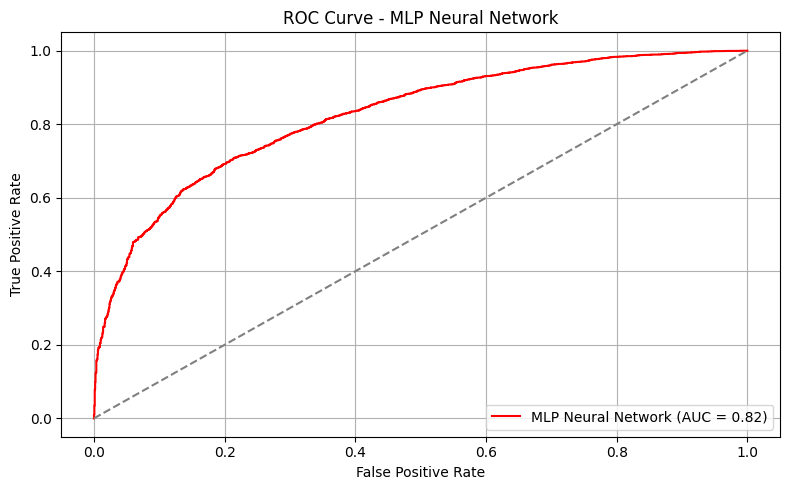

In [ ]:
# ROC Curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Neural Network (AUC = {roc_auc_mlp:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP Neural Network")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest

Random Forest (with SMOTE) Accuracy: 0.8508
ROC AUC Score: 0.9061

Confusion Matrix:
 [[1119  531]
 [ 361 3967]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1650
           1       0.88      0.92      0.90      4328

    accuracy                           0.85      5978
   macro avg       0.82      0.80      0.81      5978
weighted avg       0.85      0.85      0.85      5978



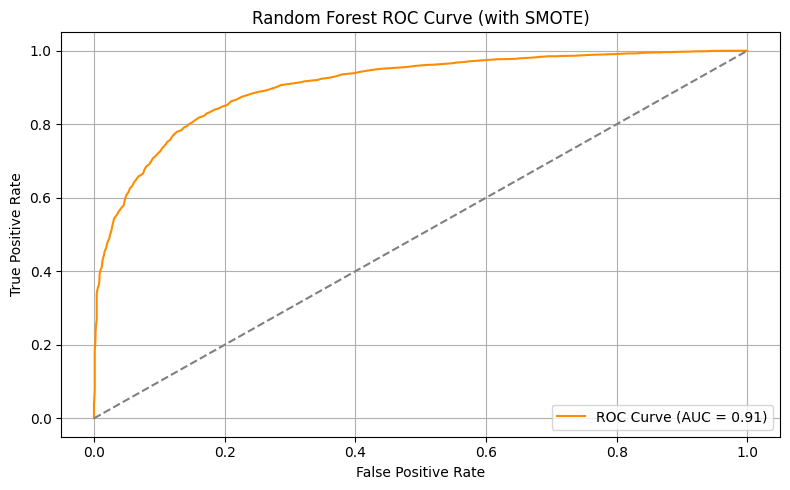

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

#Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest (with SMOTE) Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (with SMOTE)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()




Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Optimised:
Accuracy     : 0.8423
ROC AUC Score: 0.8982
Confusion Matrix:
 [[1090  551]
 [ 392 3945]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      1641
           1       0.88      0.91      0.89      4337

    accuracy                           0.84      5978
   macro avg       0.81      0.79      0.80      5978
weighted avg       0.84      0.84      0.84      5978



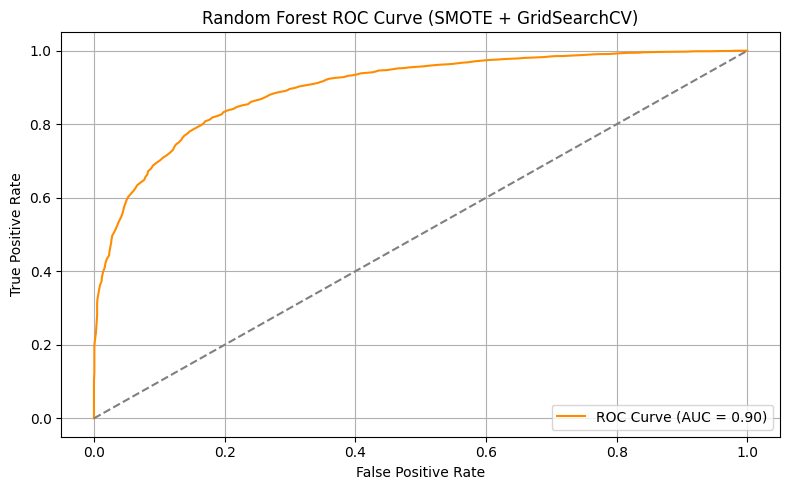

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

#  Predict
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

#  Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nRandom Forest Optimised:")
print(f"Accuracy     : {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve (SMOTE + GridSearchCV)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


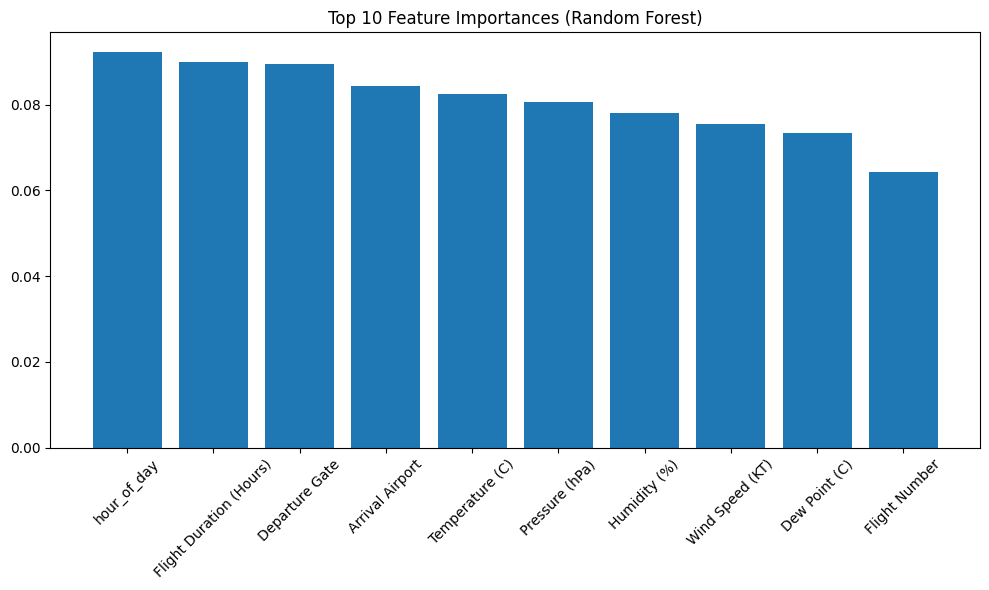

In [ ]:
# Feature importance (Top 10)
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Get top 10 features
top_n = 10
top_indices = indices[:top_n]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(top_n), top_importances, align="center")
plt.xticks(range(top_n), top_features, rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Convert test data to DataFrame with column names
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Sample a smaller portion of test data for SHAP
X_sample = X_test_df.sample(n=500, random_state=42)

#SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)

#SHAP Summary Plot
shap.summary_plot(shap_values, X_sample)



# KNN

In [ ]:
# KNN model (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation
y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Results:
Accuracy: 0.7564
Confusion Matrix:
 [[ 692  949]
 [ 507 3830]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.42      0.49      1641
           1       0.80      0.88      0.84      4337

    accuracy                           0.76      5978
   macro avg       0.69      0.65      0.66      5978
weighted avg       0.74      0.76      0.74      5978



Optimized KNN Results with SMOTE:
Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Accuracy: 0.7400
Confusion Matrix:
 [[1013  628]
 [ 926 3411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57      1641
           1       0.84      0.79      0.81      4337

    accuracy                           0.74      5978
   macro avg       0.68      0.70      0.69      5978
weighted avg       0.76      0.74      0.75      5978

ROC AUC Score: 0.7605


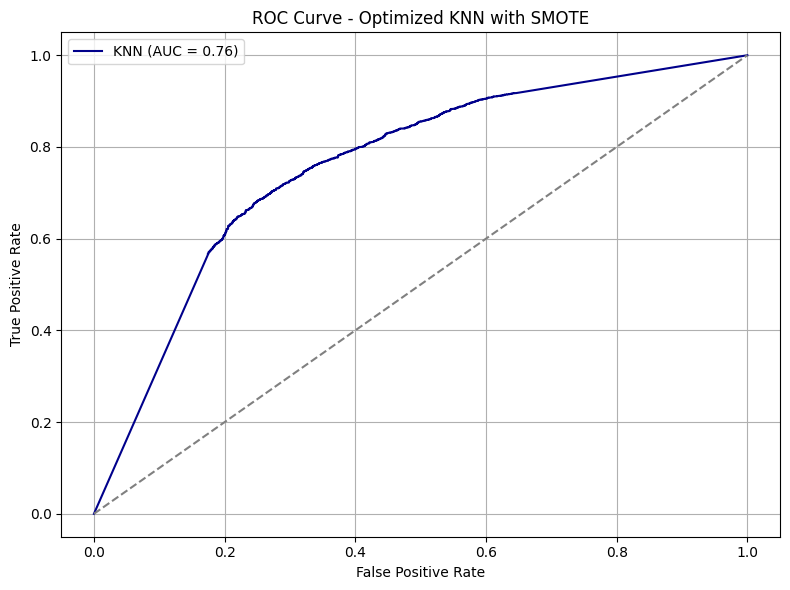

In [ ]:
# SMOTE object
smote = SMOTE(random_state=42)

#pipeline with SMOTE and KNN
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

# hyperparameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predict on test set
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
print("Optimized KNN Results with SMOTE:")
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC AUC Score
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"ROC AUC Score: {roc_auc_knn:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Optimized KNN with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# ADA Classifier

In [ ]:
#Define features and target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Predictions & Evaluation
y_pred_ada = ada_model.predict(X_test_scaled)

print("AdaBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Results:
Accuracy: 0.7412
Confusion Matrix:
 [[ 392 1258]
 [ 289 4039]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.24      0.34      1650
           1       0.76      0.93      0.84      4328

    accuracy                           0.74      5978
   macro avg       0.67      0.59      0.59      5978
weighted avg       0.71      0.74      0.70      5978



Optimized AdaBoost Results with SMOTE:
Best Parameters: {'ada__learning_rate': 1.0, 'ada__n_estimators': 200}
Accuracy: 0.6914
Confusion Matrix:
 [[ 998  652]
 [1193 3135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      1650
           1       0.83      0.72      0.77      4328

    accuracy                           0.69      5978
   macro avg       0.64      0.66      0.65      5978
weighted avg       0.73      0.69      0.70      5978

ROC AUC Score: 0.7314


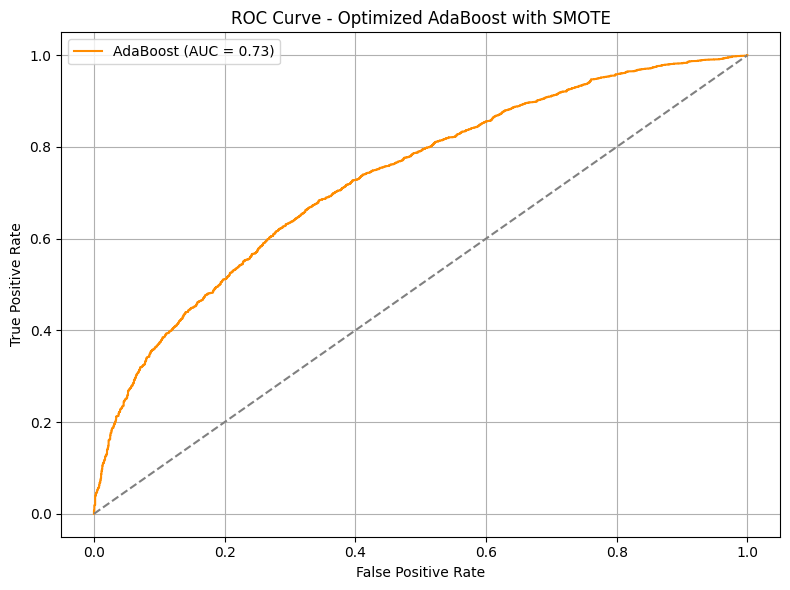

In [ ]:
# Define features and target
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
])

# hyperparameter grid
param_grid = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0]
}

#Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict using best model
best_ada = grid_search.best_estimator_
y_pred_ada = best_ada.predict(X_test)
y_proba_ada = best_ada.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluation
print("Optimized AdaBoost Results with SMOTE:")
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# ROC AUC Score
roc_auc_ada = roc_auc_score(y_test, y_proba_ada)
print(f"ROC AUC Score: {roc_auc_ada:.4f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba_ada)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Optimized AdaBoost with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Naive Bayes


In [ ]:
#Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate
print("Naive Bayes Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Model Results:
Accuracy: 0.697390431582469

Confusion Matrix:
 [[ 585 1065]
 [ 744 3584]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.35      0.39      1650
           1       0.77      0.83      0.80      4328

    accuracy                           0.70      5978
   macro avg       0.61      0.59      0.60      5978
weighted avg       0.68      0.70      0.69      5978



Naive Bayes with SMOTE Results:
Accuracy: 0.6194379391100703

Confusion Matrix:
 [[1010  640]
 [1635 2693]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.61      0.47      1650
           1       0.81      0.62      0.70      4328

    accuracy                           0.62      5978
   macro avg       0.59      0.62      0.59      5978
weighted avg       0.69      0.62      0.64      5978

ROC AUC Score: 0.6606


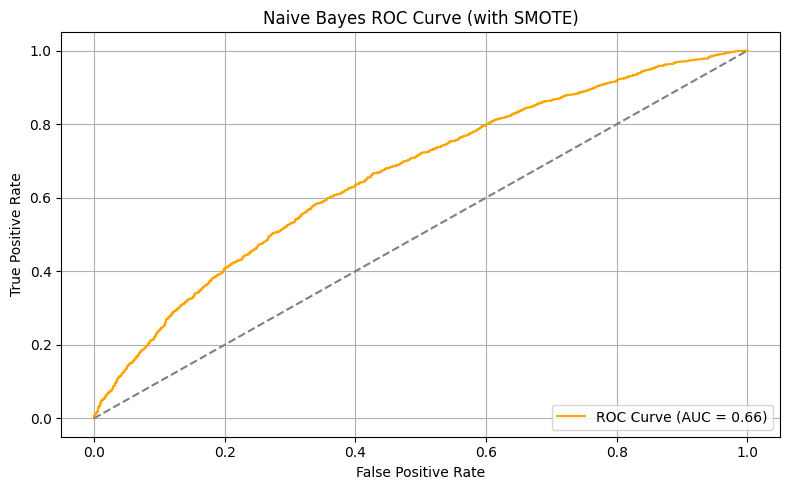

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Naive Bayes with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_nb):.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve (with SMOTE)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# SVM

SVM Model Results:
Accuracy: 0.7631
Confusion Matrix:
 [[ 407 1243]
 [ 173 4155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.25      0.37      1650
           1       0.77      0.96      0.85      4328

    accuracy                           0.76      5978
   macro avg       0.74      0.60      0.61      5978
weighted avg       0.75      0.76      0.72      5978

ROC AUC Score: 0.7437


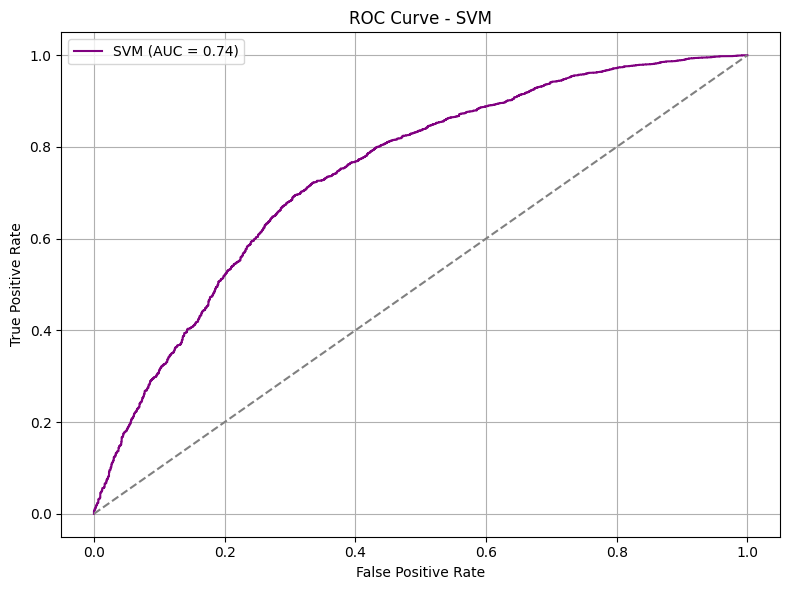

In [ ]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# Evaluation
print("SVM Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# ROC AUC Score
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"ROC AUC Score: {roc_auc_svm:.4f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVM with SMOTE and GridSearchCV Results:
Best Parameters: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Accuracy: 0.7106
Confusion Matrix:
 [[1077  573]
 [1157 3171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.65      0.55      1650
           1       0.85      0.73      0.79      4328

    accuracy                           0.71      5978
   macro avg       0.66      0.69      0.67      5978
weighted avg       0.75      0.71      0.72      5978

ROC AUC Score: 0.7609


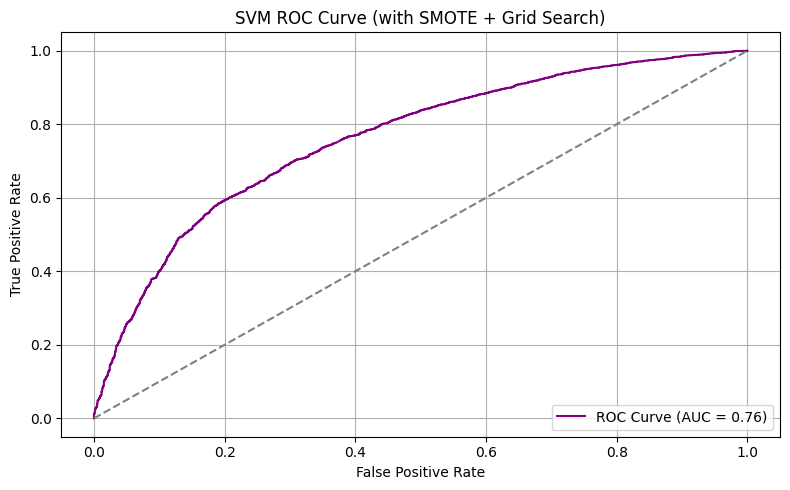

In [ ]:
X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pipeline with SMOTE and SVC
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])

# hyperparameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01, 0.1, 1],
    'svc__kernel': ['rbf']  # You can also include 'linear' or 'poly' if you want
}

# Grid search
grid_search = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svc_model = grid_search.best_estimator_

# Predictions
y_pred = best_svc_model.predict(X_test_scaled)
y_prob = best_svc_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("SVM with SMOTE and GridSearchCV Results:")
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (with SMOTE + Grid Search)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Optimised stacking models based on the results

Stacking Classifier Results:
Accuracy: 0.8563
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1650
           1       0.89      0.92      0.90      4328

    accuracy                           0.86      5978
   macro avg       0.83      0.81      0.81      5978
weighted avg       0.85      0.86      0.85      5978

ROC AUC Score: 0.9081


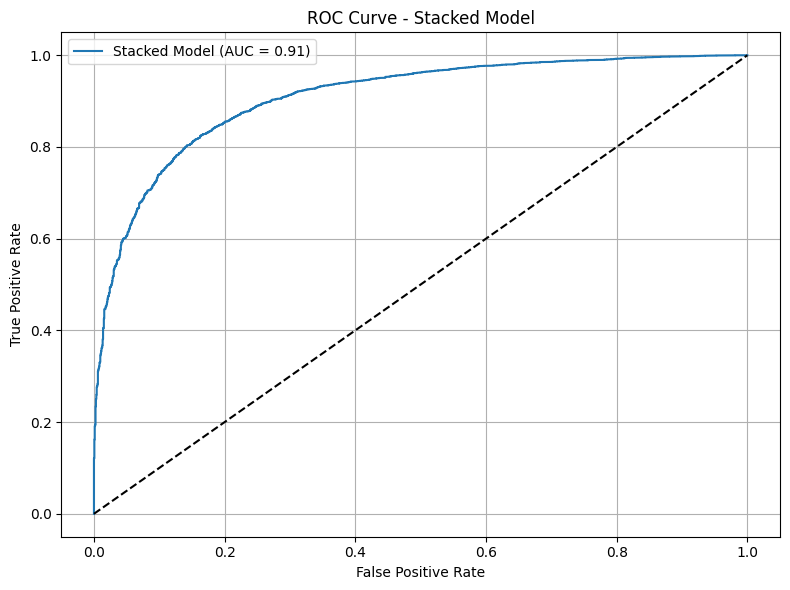

In [ ]:

X = ml_df.drop(columns=['Delayed'])
y = ml_df['Delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE and scaling pipeline
preprocess = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42))
])

X_train_processed, y_train_processed = preprocess.fit_resample(X_train, y_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

# Base learners
base_learners = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
]

# Meta learner
meta_learner = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

# stacking model
stacking_model.fit(X_train_processed, y_train_processed)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test_scaled)
y_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

print("Stacking Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_stack):.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacked Model (AUC = {roc_auc_score(y_test, y_proba_stack):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Stacked Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


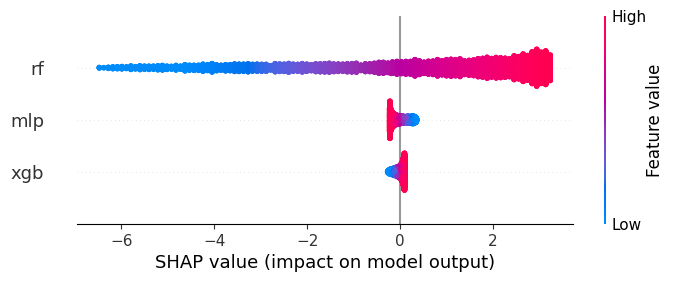

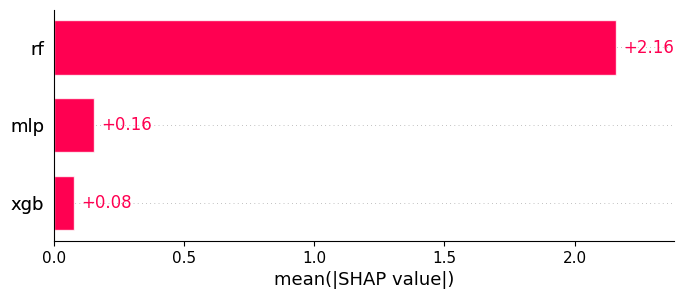

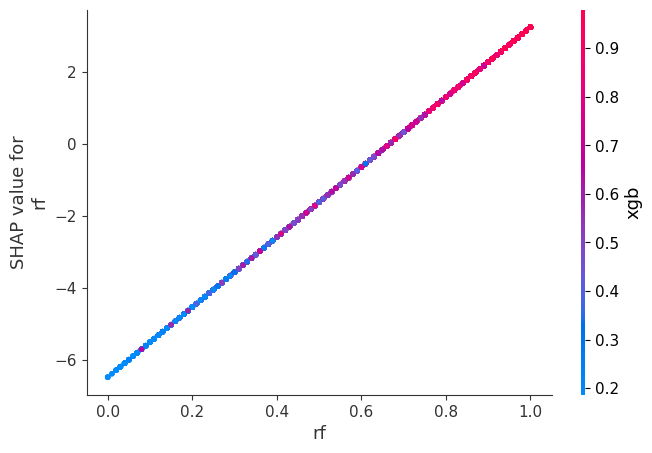

In [ ]:
# Get the base models
base_models = [model for _, model in stacking_model.named_estimators_.items()]

# Generate prediction probabilities from each base model
meta_input_test = np.column_stack([
    model.predict_proba(X_test_scaled)[:, 1] for model in base_models
])

#name the columns for interpretability
meta_input_df = pd.DataFrame(meta_input_test, columns=[name for name, _ in base_learners])

# Get the trained meta-learner
meta_model = stacking_model.final_estimator_

# SHAP analysis on meta-learner
explainer = shap.Explainer(meta_model, meta_input_df)
shap_values = explainer(meta_input_df)

# Visualise global feature importance
shap.plots.beeswarm(shap_values)

# summary bar plot
shap.plots.bar(shap_values)

# dependence plot to see how one base model's prediction affects output
shap.dependence_plot("rf", shap_values.values, meta_input_df)




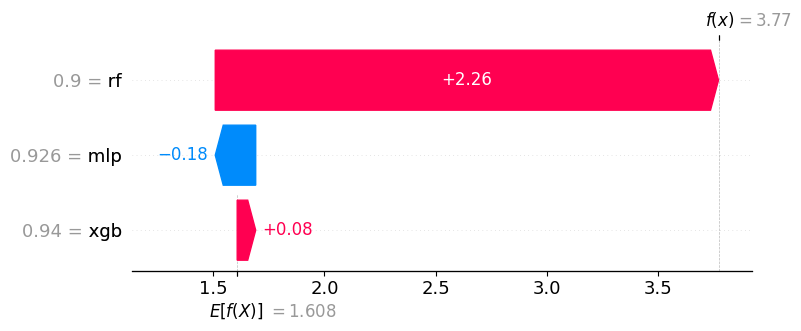

In [ ]:
# one instance to explain
instance_idx = 5

#waterfall plot for that instance
shap.plots.waterfall(shap_values[instance_idx])


# Presenting Data in Tables

Questions to ask tomorrow - Should i run the cluster analysis to compare to raw weather data

Should i do time series analysis


In [ ]:
# model results table
data = {
    "Model": [
        "Logistic Regression", "XGBoost", "Gradient Boosting", "Light Gradient Boosting",
        "Convolutional Neural Networks", "SVM", "MLP (Neural Networks)", "Random Forest",
        "KNN", "Ada Classifier", "Naive Bayes", "Stacking 1 (XGB + RF + MLP + LG)"
    ],
    "Model Accuracy": [0.64, 0.83, 0.80, 0.81, 0.69, 0.76, 0.72, 0.85, 0.74, 0.69, 0.61, 0.86],
    "Precision": [0.70, 0.83, 0.80, 0.80, 0.73, 0.75, 0.76, 0.85, 0.76, 0.72, 0.69, 0.85],
    "Recall": [0.64, 0.83, 0.80, 0.81, 0.69, 0.76, 0.72, 0.85, 0.74, 0.69, 0.61, 0.86],
    "F1 Score": [0.65, 0.83, 0.80, 0.80, 0.70, 0.72, 0.73, 0.85, 0.75, 0.70, 0.63, 0.85],
    "AUC SCORE": [0.68, 0.87, 0.84, 0.85, 0.75, 0.74, 0.79, 0.91, 0.77, 0.73, 0.66, 0.91]
}

results_df = pd.DataFrame(data)
ranked_df = results_df.sort_values(by=["Model Accuracy", "AUC SCORE"], ascending=False).reset_index(drop=True)

# ranked table
ranked_df.style.set_caption("Ranked Classification Models by Accuracy and AUC Score").format(precision=2)




,Model,Model Accuracy,Precision,Recall,F1 Score,AUC SCORE
0,Stacking 1 (XGB + RF + MLP + LG),0.86,0.85,0.86,0.85,0.91
1,Random Forest,0.85,0.85,0.85,0.85,0.91
2,XGBoost,0.83,0.83,0.83,0.83,0.87
3,Light Gradient Boosting,0.81,0.80,0.81,0.80,0.85
4,Gradient Boosting,0.80,0.80,0.80,0.80,0.84
5,SVM,0.76,0.75,0.76,0.72,0.74
6,KNN,0.74,0.76,0.74,0.75,0.77
7,MLP (Neural Networks),0.72,0.76,0.72,0.73,0.79
8,Convolutional Neural Networks,0.69,0.73,0.69,0.70,0.75
9,Ada Classifier,0.69,0.72,0.69,0.70,0.73


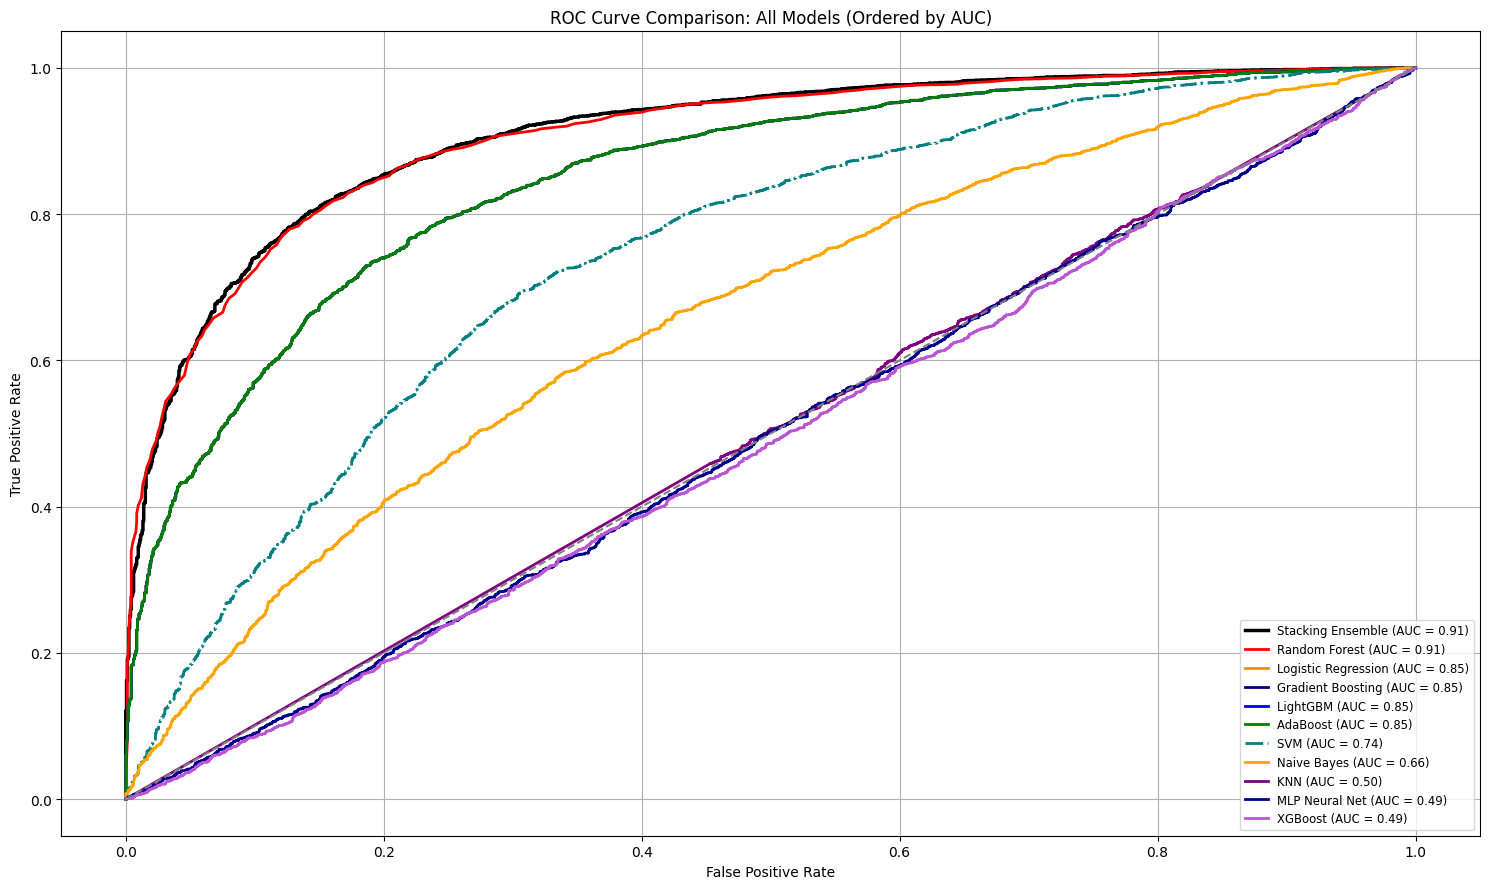

In [ ]:
y_prob_logreg = y_prob
y_prob_lgbm = y_prob
y_prob_gb = y_prob
y_prob_xgb = y_pred_prob

# model names and their ROC values
model_data = {
    "Logistic Regression": roc_curve(y_test, y_prob_logreg),
    "Random Forest": roc_curve(y_test, y_prob_rf),
    "Gradient Boosting": roc_curve(y_test, y_prob_gb),
    "XGBoost": roc_curve(y_test, y_prob_xgb),
    "LightGBM": roc_curve(y_test, y_prob_lgbm),
    "AdaBoost": roc_curve(y_test, y_proba_ada),
    "Naive Bayes": roc_curve(y_test, y_prob_nb),
    "KNN": roc_curve(y_test, y_proba_knn),
    "SVM": roc_curve(y_test, y_proba_svm),
    "MLP Neural Net": roc_curve(y_test, y_pred_prob_mlp),
    "Stacking Ensemble": roc_curve(y_test, y_proba_stack),
}

# AUCs and packed all info into a list
model_metrics = []
for name, (fpr, tpr, _) in model_data.items():
    model_metrics.append({
        "name": name,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc(fpr, tpr)
    })

# Sort by AUC descending
model_metrics = sorted(model_metrics, key=lambda x: x["auc"], reverse=True)

# Plot
plt.figure(figsize=(15, 9))
colors = [
    'black', 'red', 'darkorange', 'navy', 'blue', 'green',
    'teal', 'orange', 'purple', 'darkblue', 'mediumorchid'
]

for i, model in enumerate(model_metrics):
    linestyle = '-.' if model["name"] == "SVM" else '-'
    lw = 2.5 if model["name"] == "Stacking Ensemble" else 2
    plt.plot(
        model["fpr"],
        model["tpr"],
        label=f'{model["name"]} (AUC = {model["auc"]:.2f})',
        color=colors[i % len(colors)],
        linestyle=linestyle,
        linewidth=lw
    )

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: All Models (Ordered by AUC)")
plt.legend(loc='lower right', fontsize='small', frameon=True)
plt.grid(True)
plt.tight_layout()
plt.show()




